# Business Problem:
- Make a model to predict demand for shared bikes
- The model will help management to understand impact of various independantfeatures on the variation in demand
- This will help to manipulate business strategy to meet deman levels and customer expectations 

# Steps:
1. Read, visualize and understand the data 
    - Perform data quality checks
    - Perform EDA to understand the data relations
2. Prepare the data for modelling (train-test split, rescaling etc)
    - Handling categorical variables - convert binary variables to 0 & 1 and other categorical variables to dummies
3. Train the model
4. Residual Analysis
5. Prediction and evaluation on test data    

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Check for nulls or missing values:
bike.info()
# There are 730 rows with 16 columns. All columns have values and hence can not be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Converting date to Pandas datetime format
#bike['dteday'] = pd.to_datetime(bike['dteday'])
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
# Check numerical variables - 
bike.describe()

instant               dteday      season          yr        mnth  \
count  730.000000                  730  730.000000  730.000000  730.000000   
mean   365.500000  2018-12-31 12:00:00    2.498630    0.500000    6.526027   
min      1.000000  2018-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.250000  2018-07-02 06:00:00    2.000000    0.000000    4.000000   
50%    365.500000  2018-12-31 12:00:00    3.000000    0.500000    7.000000   
75%    547.750000  2019-07-01 18:00:00    3.000000    1.000000   10.000000   
max    730.000000  2019-12-31 00:00:00    4.000000    1.000000   12.000000   
std    210.877136                  NaN    1.110184    0.500343    3.450215   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.028767    2.997260    0.683562    1.394521   20.319259   23.726322   
min      0.000000    0.000000    0.000000    1.000000    2.424346    3.953480   
25%      0.000000    1.000000    0.000000    1.000000   13.811885   16.889713   
50%      0.000000    3.000000    1.000000    1.000000   20.465826   24.368225   
75%      0.000000    5.000000    1.000000    2.000000   26.880615   30.445775   
max      1.000000    6.000000    1.000000    3.000000   35.328347   42.044800   
std      0.167266    2.006161    0.465405    0.544807    7.506729    8.150308   

              hum   windspeed       casual   registered          cnt  
count  730.000000  730.000000   730.000000   730.000000   730.000000  
mean    62.765175   12.763620   849.249315  3658.757534  4508.006849  
min      0.000000    1.500244     2.000000    20.000000    22.000000  
25%     52.000000    9.041650   316.250000  2502.250000  3169.750000  
50%     62.625000   12.125325   717.000000  3664.500000  4548.500000  
75%     72.989575   15.625589  1096.500000  4783.250000  5966.000000  
max     97.250000   34.000021  3410.000000  6946.000000  8714.000000  
std     14.237589    5.195841   686.479875  1559.758728  1936.011647

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

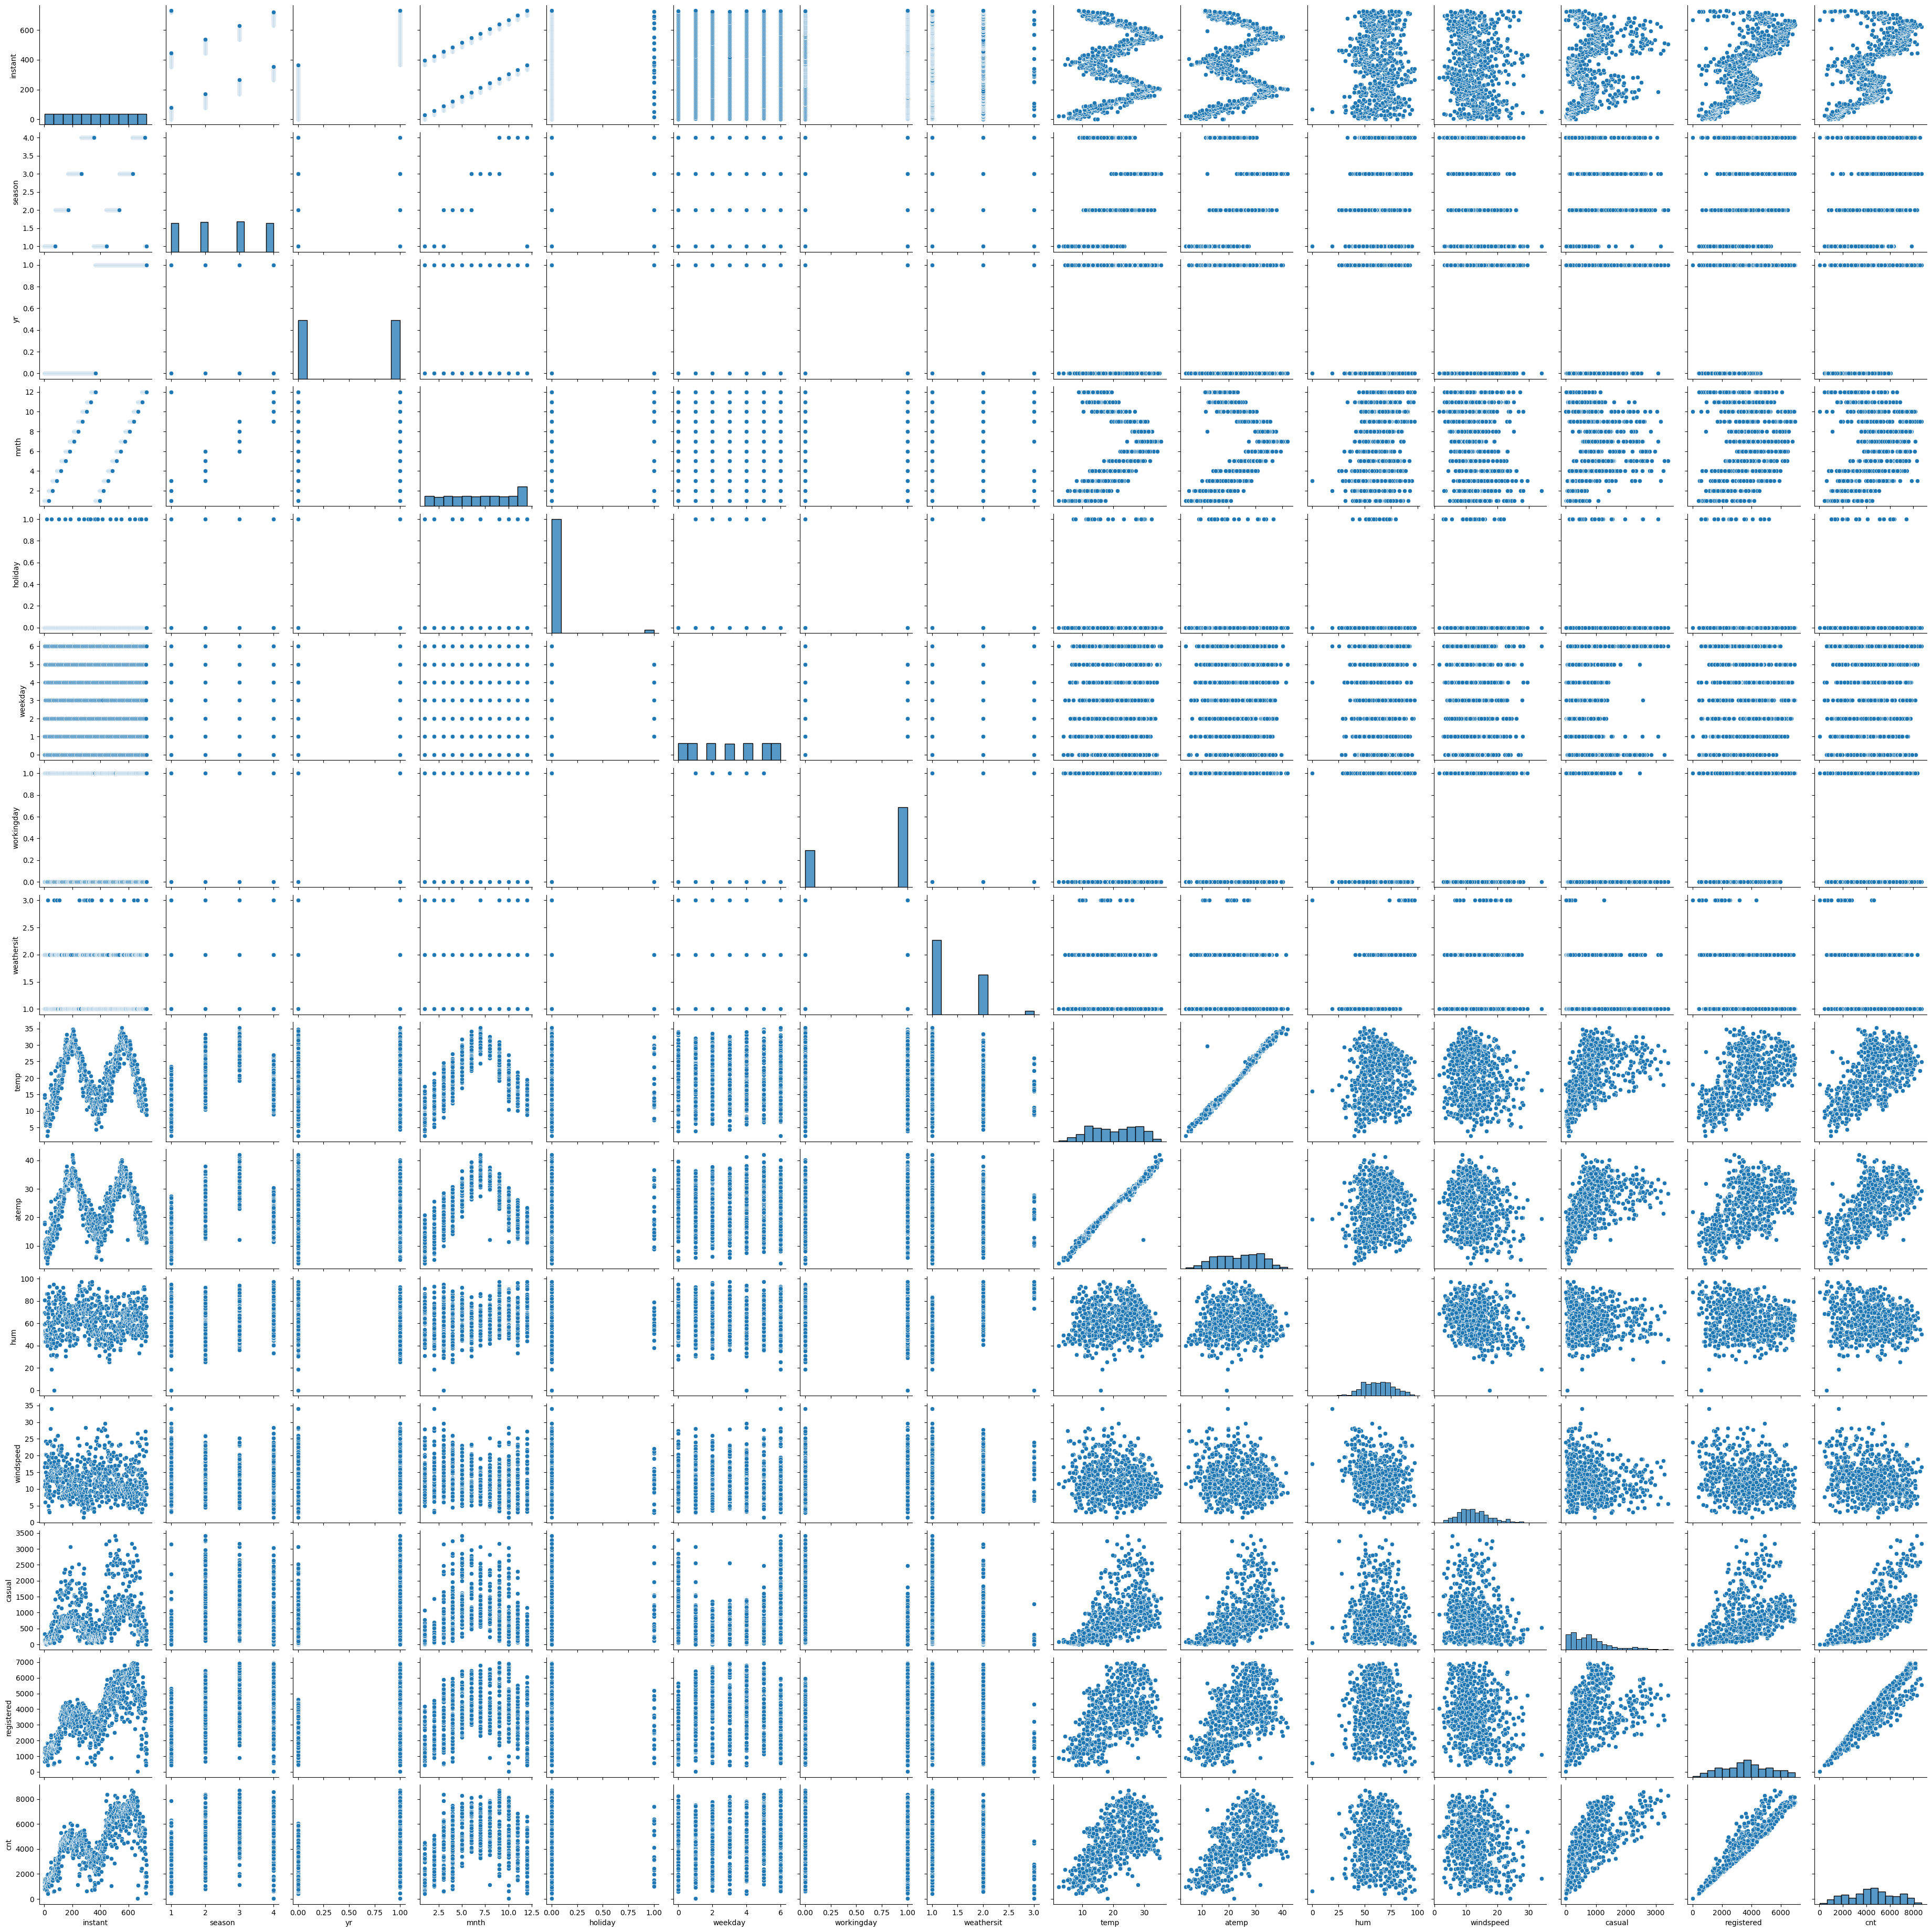

In [8]:
# visualize the data tosee if there is a linear relationship between the variables
sns.pairplot(bike)
plt.show()
# 1. The casual bikingg seems to be lower in spring and hence the total biking trends seems to be lower in spring
# 2. The biking trend seems to be pickiing up prior to pandemic and hence ride count is higher in 2019
# 3. Jan, Feb, Nov and Dec have lower biking trend
# 4. Temperature is positively correlated with bike rides

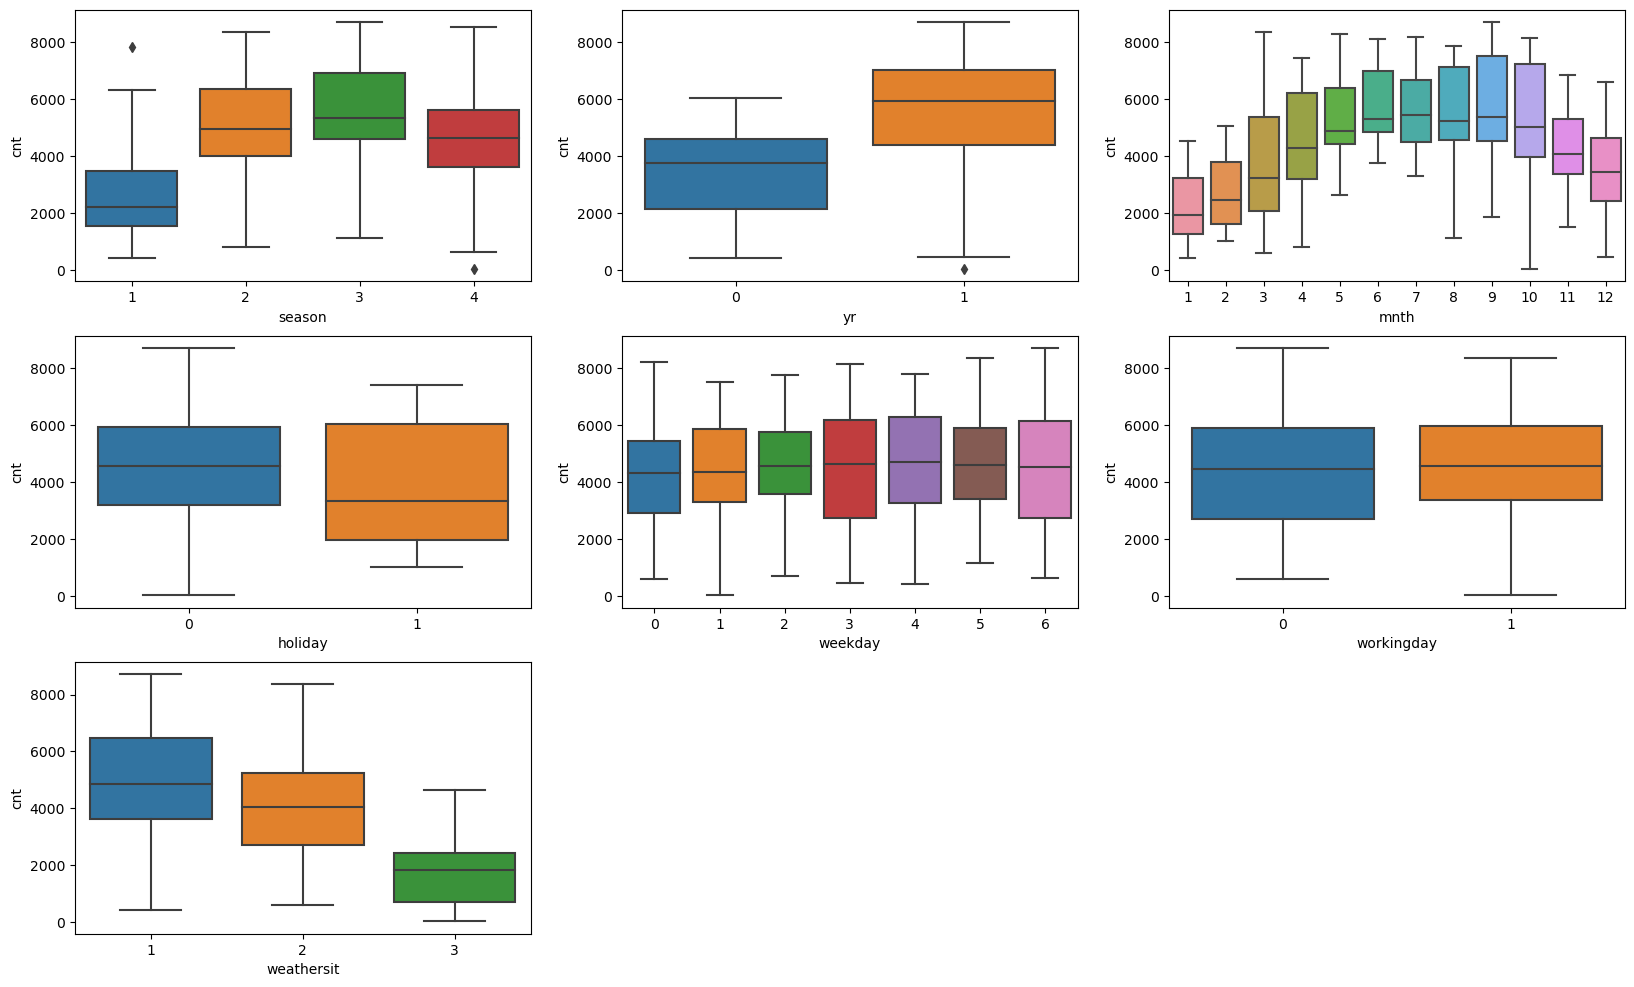

In [10]:
#Visualizing categorical variables - 'season','yr','mnth','holiday','weekday','workingday','weathersit'
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()
# Inferences: 
# Demand for bikes seems higher in Season 2 (Summer)and 3 (fall)
# Demand in 2019 is higher
# Season and Month are corelated
# Demand is higher when the whether is clear (1)

## Step 3: Data Preparation
- As we can see all binary columns have 1 or 0, and hence no need to transform these variables - 'yr', 'holiday', 'workingday'
- But there are other categorical variables - 'season','mnth','weekday','weathersit' and we need to convert them to dummy variables for analysis. 

In [11]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(bike['season'], drop_first=True).astype(int)

In [12]:
# Check what the dataset 'status' looks like
status.head(100)

2  3  4
0   0  0  0
1   0  0  0
2   0  0  0
3   0  0  0
4   0  0  0
.. .. .. ..
95  1  0  0
96  1  0  0
97  1  0  0
98  1  0  0
99  1  0  0

[100 rows x 3 columns]

In [13]:
# Rename the columns to '2':  'Summer', '3': 'Fall', '4': 'Winter'
status.columns = ['Summer', 'Fall', 'Winter']
status.head()

Summer  Fall  Winter
0       0     0       0
1       0     0       0
2       0     0       0
3       0     0       0
4       0     0       0

In [14]:
bike = pd.concat([bike, status], axis=1)

In [15]:
bike.head(100)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1 2018-01-01       1   0     1        0        6           0   
1         2 2018-01-02       1   0     1        0        0           0   
2         3 2018-01-03       1   0     1        0        1           1   
3         4 2018-01-04       1   0     1        0        2           1   
4         5 2018-01-05       1   0     1        0        3           1   
..      ...        ...     ...  ..   ...      ...      ...         ...   
95       96 2018-04-06       2   0     4        0        3           1   
96       97 2018-04-07       2   0     4        0        4           1   
97       98 2018-04-08       2   0     4        0        5           1   
98       99 2018-04-09       2   0     4        0        6           0   
99      100 2018-04-10       2   0     4        0        0           0   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
95           1  16.024153  19.38040  47.0833  17.625221     413        2395   
96           1  17.937500  21.68480  60.2917  10.874904     571        2570   
97           2  13.769153  16.22395  83.6250  15.208464     172        1299   
98           2  14.042500  17.07645  87.7500   8.916561     879        1576   
99           2  17.493347  21.33685  85.7500   9.833389    1188        1707   

     cnt  Summer  Fall  Winter  
0    985       0     0       0  
1    801       0     0       0  
2   1349       0     0       0  
3   1562       0     0       0  
4   1600       0     0       0  
..   ...     ...   ...     ...  
95  2808       1     0       0  
96  3141       1     0       0  
97  1471       1     0       0  
98  2455       1     0       0  
99  2895       1     0       0  

[100 rows x 19 columns]

In [16]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status'
status = pd.get_dummies(bike['mnth'], drop_first=True).astype(int)
# Check what the dataset 'status' looks like
status.head(100)

2   3   4   5   6   7   8   9   10  11  12
0    0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0
3    0   0   0   0   0   0   0   0   0   0   0
4    0   0   0   0   0   0   0   0   0   0   0
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
95   0   0   1   0   0   0   0   0   0   0   0
96   0   0   1   0   0   0   0   0   0   0   0
97   0   0   1   0   0   0   0   0   0   0   0
98   0   0   1   0   0   0   0   0   0   0   0
99   0   0   1   0   0   0   0   0   0   0   0

[100 rows x 11 columns]

In [17]:
# Rename the columns
status.columns = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
status.head(100)

Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0     0    0    0    0    0    0    0    0    0    0    0
1     0    0    0    0    0    0    0    0    0    0    0
2     0    0    0    0    0    0    0    0    0    0    0
3     0    0    0    0    0    0    0    0    0    0    0
4     0    0    0    0    0    0    0    0    0    0    0
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
95    0    0    1    0    0    0    0    0    0    0    0
96    0    0    1    0    0    0    0    0    0    0    0
97    0    0    1    0    0    0    0    0    0    0    0
98    0    0    1    0    0    0    0    0    0    0    0
99    0    0    1    0    0    0    0    0    0    0    0

[100 rows x 11 columns]

In [18]:
#Concat the DS
bike = pd.concat([bike, status], axis=1)
bike.head(100)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1 2018-01-01       1   0     1        0        6           0   
1         2 2018-01-02       1   0     1        0        0           0   
2         3 2018-01-03       1   0     1        0        1           1   
3         4 2018-01-04       1   0     1        0        2           1   
4         5 2018-01-05       1   0     1        0        3           1   
..      ...        ...     ...  ..   ...      ...      ...         ...   
95       96 2018-04-06       2   0     4        0        3           1   
96       97 2018-04-07       2   0     4        0        4           1   
97       98 2018-04-08       2   0     4        0        5           1   
98       99 2018-04-09       2   0     4        0        6           0   
99      100 2018-04-10       2   0     4        0        0           0   

    weathersit       temp  ...  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  \
0            2  14.110847  ...    0    0    0    0    0    0    0    0    0   
1            2  14.902598  ...    0    0    0    0    0    0    0    0    0   
2            1   8.050924  ...    0    0    0    0    0    0    0    0    0   
3            1   8.200000  ...    0    0    0    0    0    0    0    0    0   
4            1   9.305237  ...    0    0    0    0    0    0    0    0    0   
..         ...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95           1  16.024153  ...    0    1    0    0    0    0    0    0    0   
96           1  17.937500  ...    0    1    0    0    0    0    0    0    0   
97           2  13.769153  ...    0    1    0    0    0    0    0    0    0   
98           2  14.042500  ...    0    1    0    0    0    0    0    0    0   
99           2  17.493347  ...    0    1    0    0    0    0    0    0    0   

    Dec  
0     0  
1     0  
2     0  
3     0  
4     0  
..  ...  
95    0  
96    0  
97    0  
98    0  
99    0  

[100 rows x 30 columns]

In [19]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday'
status = pd.get_dummies(bike['weekday'], drop_first=True).astype(int)
# Check what the dataset 'status' looks like
status.head(100)

1  2  3  4  5  6
0   0  0  0  0  0  1
1   0  0  0  0  0  0
2   1  0  0  0  0  0
3   0  1  0  0  0  0
4   0  0  1  0  0  0
.. .. .. .. .. .. ..
95  0  0  1  0  0  0
96  0  0  0  1  0  0
97  0  0  0  0  1  0
98  0  0  0  0  0  1
99  0  0  0  0  0  0

[100 rows x 6 columns]

In [20]:
# Rename the columns
status.columns = ['Day2','Day3','Day4','Day5','Day6','Day7']
status.head()

Day2  Day3  Day4  Day5  Day6  Day7
0     0     0     0     0     0     1
1     0     0     0     0     0     0
2     1     0     0     0     0     0
3     0     1     0     0     0     0
4     0     0     1     0     0     0

In [21]:
#Concat the DS
bike = pd.concat([bike, status], axis=1)
bike.head(100)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1 2018-01-01       1   0     1        0        6           0   
1         2 2018-01-02       1   0     1        0        0           0   
2         3 2018-01-03       1   0     1        0        1           1   
3         4 2018-01-04       1   0     1        0        2           1   
4         5 2018-01-05       1   0     1        0        3           1   
..      ...        ...     ...  ..   ...      ...      ...         ...   
95       96 2018-04-06       2   0     4        0        3           1   
96       97 2018-04-07       2   0     4        0        4           1   
97       98 2018-04-08       2   0     4        0        5           1   
98       99 2018-04-09       2   0     4        0        6           0   
99      100 2018-04-10       2   0     4        0        0           0   

    weathersit       temp  ...  Sep  Oct  Nov  Dec  Day2  Day3  Day4  Day5  \
0            2  14.110847  ...    0    0    0    0     0     0     0     0   
1            2  14.902598  ...    0    0    0    0     0     0     0     0   
2            1   8.050924  ...    0    0    0    0     1     0     0     0   
3            1   8.200000  ...    0    0    0    0     0     1     0     0   
4            1   9.305237  ...    0    0    0    0     0     0     1     0   
..         ...        ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   
95           1  16.024153  ...    0    0    0    0     0     0     1     0   
96           1  17.937500  ...    0    0    0    0     0     0     0     1   
97           2  13.769153  ...    0    0    0    0     0     0     0     0   
98           2  14.042500  ...    0    0    0    0     0     0     0     0   
99           2  17.493347  ...    0    0    0    0     0     0     0     0   

    Day6  Day7  
0      0     1  
1      0     0  
2      0     0  
3      0     0  
4      0     0  
..   ...   ...  
95     0     0  
96     0     0  
97     1     0  
98     0     1  
99     0     0  

[100 rows x 36 columns]

In [22]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit'
status = pd.get_dummies(bike['weathersit'], drop_first=True).astype(int)
# Check what the dataset 'status' looks like
status.head(100)

2  3
0   1  0
1   1  0
2   0  0
3   0  0
4   0  0
.. .. ..
95  0  0
96  0  0
97  1  0
98  1  0
99  1  0

[100 rows x 2 columns]

In [23]:
# Rename the columns
status.columns = ['ok_weather','bad_weather']
status.head()

ok_weather  bad_weather
0           1            0
1           1            0
2           0            0
3           0            0
4           0            0

In [24]:
#Concat the DS
bike = pd.concat([bike, status], axis=1)
bike.head(100)

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1 2018-01-01       1   0     1        0        6           0   
1         2 2018-01-02       1   0     1        0        0           0   
2         3 2018-01-03       1   0     1        0        1           1   
3         4 2018-01-04       1   0     1        0        2           1   
4         5 2018-01-05       1   0     1        0        3           1   
..      ...        ...     ...  ..   ...      ...      ...         ...   
95       96 2018-04-06       2   0     4        0        3           1   
96       97 2018-04-07       2   0     4        0        4           1   
97       98 2018-04-08       2   0     4        0        5           1   
98       99 2018-04-09       2   0     4        0        6           0   
99      100 2018-04-10       2   0     4        0        0           0   

    weathersit       temp  ...  Nov  Dec  Day2  Day3  Day4  Day5  Day6  Day7  \
0            2  14.110847  ...    0    0     0     0     0     0     0     1   
1            2  14.902598  ...    0    0     0     0     0     0     0     0   
2            1   8.050924  ...    0    0     1     0     0     0     0     0   
3            1   8.200000  ...    0    0     0     1     0     0     0     0   
4            1   9.305237  ...    0    0     0     0     1     0     0     0   
..         ...        ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
95           1  16.024153  ...    0    0     0     0     1     0     0     0   
96           1  17.937500  ...    0    0     0     0     0     1     0     0   
97           2  13.769153  ...    0    0     0     0     0     0     1     0   
98           2  14.042500  ...    0    0     0     0     0     0     0     1   
99           2  17.493347  ...    0    0     0     0     0     0     0     0   

    ok_weather  bad_weather  
0            1            0  
1            1            0  
2            0            0  
3            0            0  
4            0            0  
..         ...          ...  
95           0            0  
96           0            0  
97           1            0  
98           1            0  
99           1            0  

[100 rows x 38 columns]

In [25]:
# Drop 'season','mnth','weekday' and 'weathersit' as we have created the dummies for it

bike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [26]:
bike.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Summer', 'Fall',
       'Winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7',
       'ok_weather', 'bad_weather'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
We will use MinMax scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

instant     dteday  yr  holiday  workingday      temp     atemp  \
653      654 2019-10-16   1        0           1  0.509887  0.501133   
576      577 2019-07-31   1        0           1  0.815169  0.766351   
426      427 2019-03-03   1        0           0  0.442393  0.438975   
728      729 2019-12-30   1        0           0  0.245101  0.200348   
482      483 2019-04-28   1        0           0  0.395666  0.391735   

          hum  windspeed    casual  ...  Nov  Dec  Day2  Day3  Day4  Day5  \
653  0.575354   0.300794  0.280402  ...    0    0     0     1     0     0   
576  0.725633   0.264686  0.294422  ...    0    0     0     1     0     0   
426  0.640189   0.255342  0.290765  ...    0    0     0     0     0     0   
728  0.498067   0.663106  0.110332  ...    0    1     0     0     0     0   
482  0.504508   0.188475  0.340750  ...    0    0     0     0     0     0   

     Day6  Day7  ok_weather  bad_weather  
653     0     0           0            0  
576     0     0           0            0  
426     0     1           1            0  
728     0     0           0            0  
482     0     1           1            0  

[5 rows x 34 columns]

In [32]:
df_train.describe()

instant                         dteday          yr     holiday  \
count  510.000000                            510  510.000000  510.000000   
mean   368.941176  2019-01-03 22:35:17.647058944    0.507843    0.025490   
min      1.000000            2018-01-01 00:00:00    0.000000    0.000000   
25%    187.250000            2018-07-06 06:00:00    0.000000    0.000000   
50%    373.000000            2019-01-08 00:00:00    1.000000    0.000000   
75%    553.750000            2019-07-07 18:00:00    1.000000    0.000000   
max    729.000000            2019-12-30 00:00:00    1.000000    1.000000   
std    209.868619                            NaN    0.500429    0.157763   

       workingday        temp       atemp         hum   windspeed      casual  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.676471    0.537262    0.512989    0.650369    0.320768    0.254661   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.339853    0.332086    0.538643    0.199179    0.094179   
50%      1.000000    0.540519    0.526811    0.653714    0.296763    0.212740   
75%      1.000000    0.735215    0.688457    0.754830    0.414447    0.327415   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
std      0.468282    0.225844    0.212385    0.145882    0.169797    0.206011   

       ...         Nov         Dec        Day2        Day3        Day4  \
count  ...  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   ...    0.086275    0.084314    0.150980    0.131373    0.158824   
min    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
max    ...    1.000000    1.000000    1.000000    1.000000    1.000000   
std    ...    0.281045    0.278131    0.358381    0.338139    0.365870   

             Day5        Day6        Day7  ok_weather  bad_weather  
count  510.000000  510.000000  510.000000  510.000000   510.000000  
mean     0.133333    0.127451    0.154902    0.343137     0.029412  
min      0.000000    0.000000    0.000000    0.000000     0.000000  
25%      0.000000    0.000000    0.000000    0.000000     0.000000  
50%      0.000000    0.000000    0.000000    0.000000     0.000000  
75%      0.000000    0.000000    0.000000    1.000000     0.000000  
max      1.000000    1.000000    1.000000    1.000000     1.000000  
std      0.340268    0.333805    0.362166    0.475223     0.169124  

[8 rows x 34 columns]

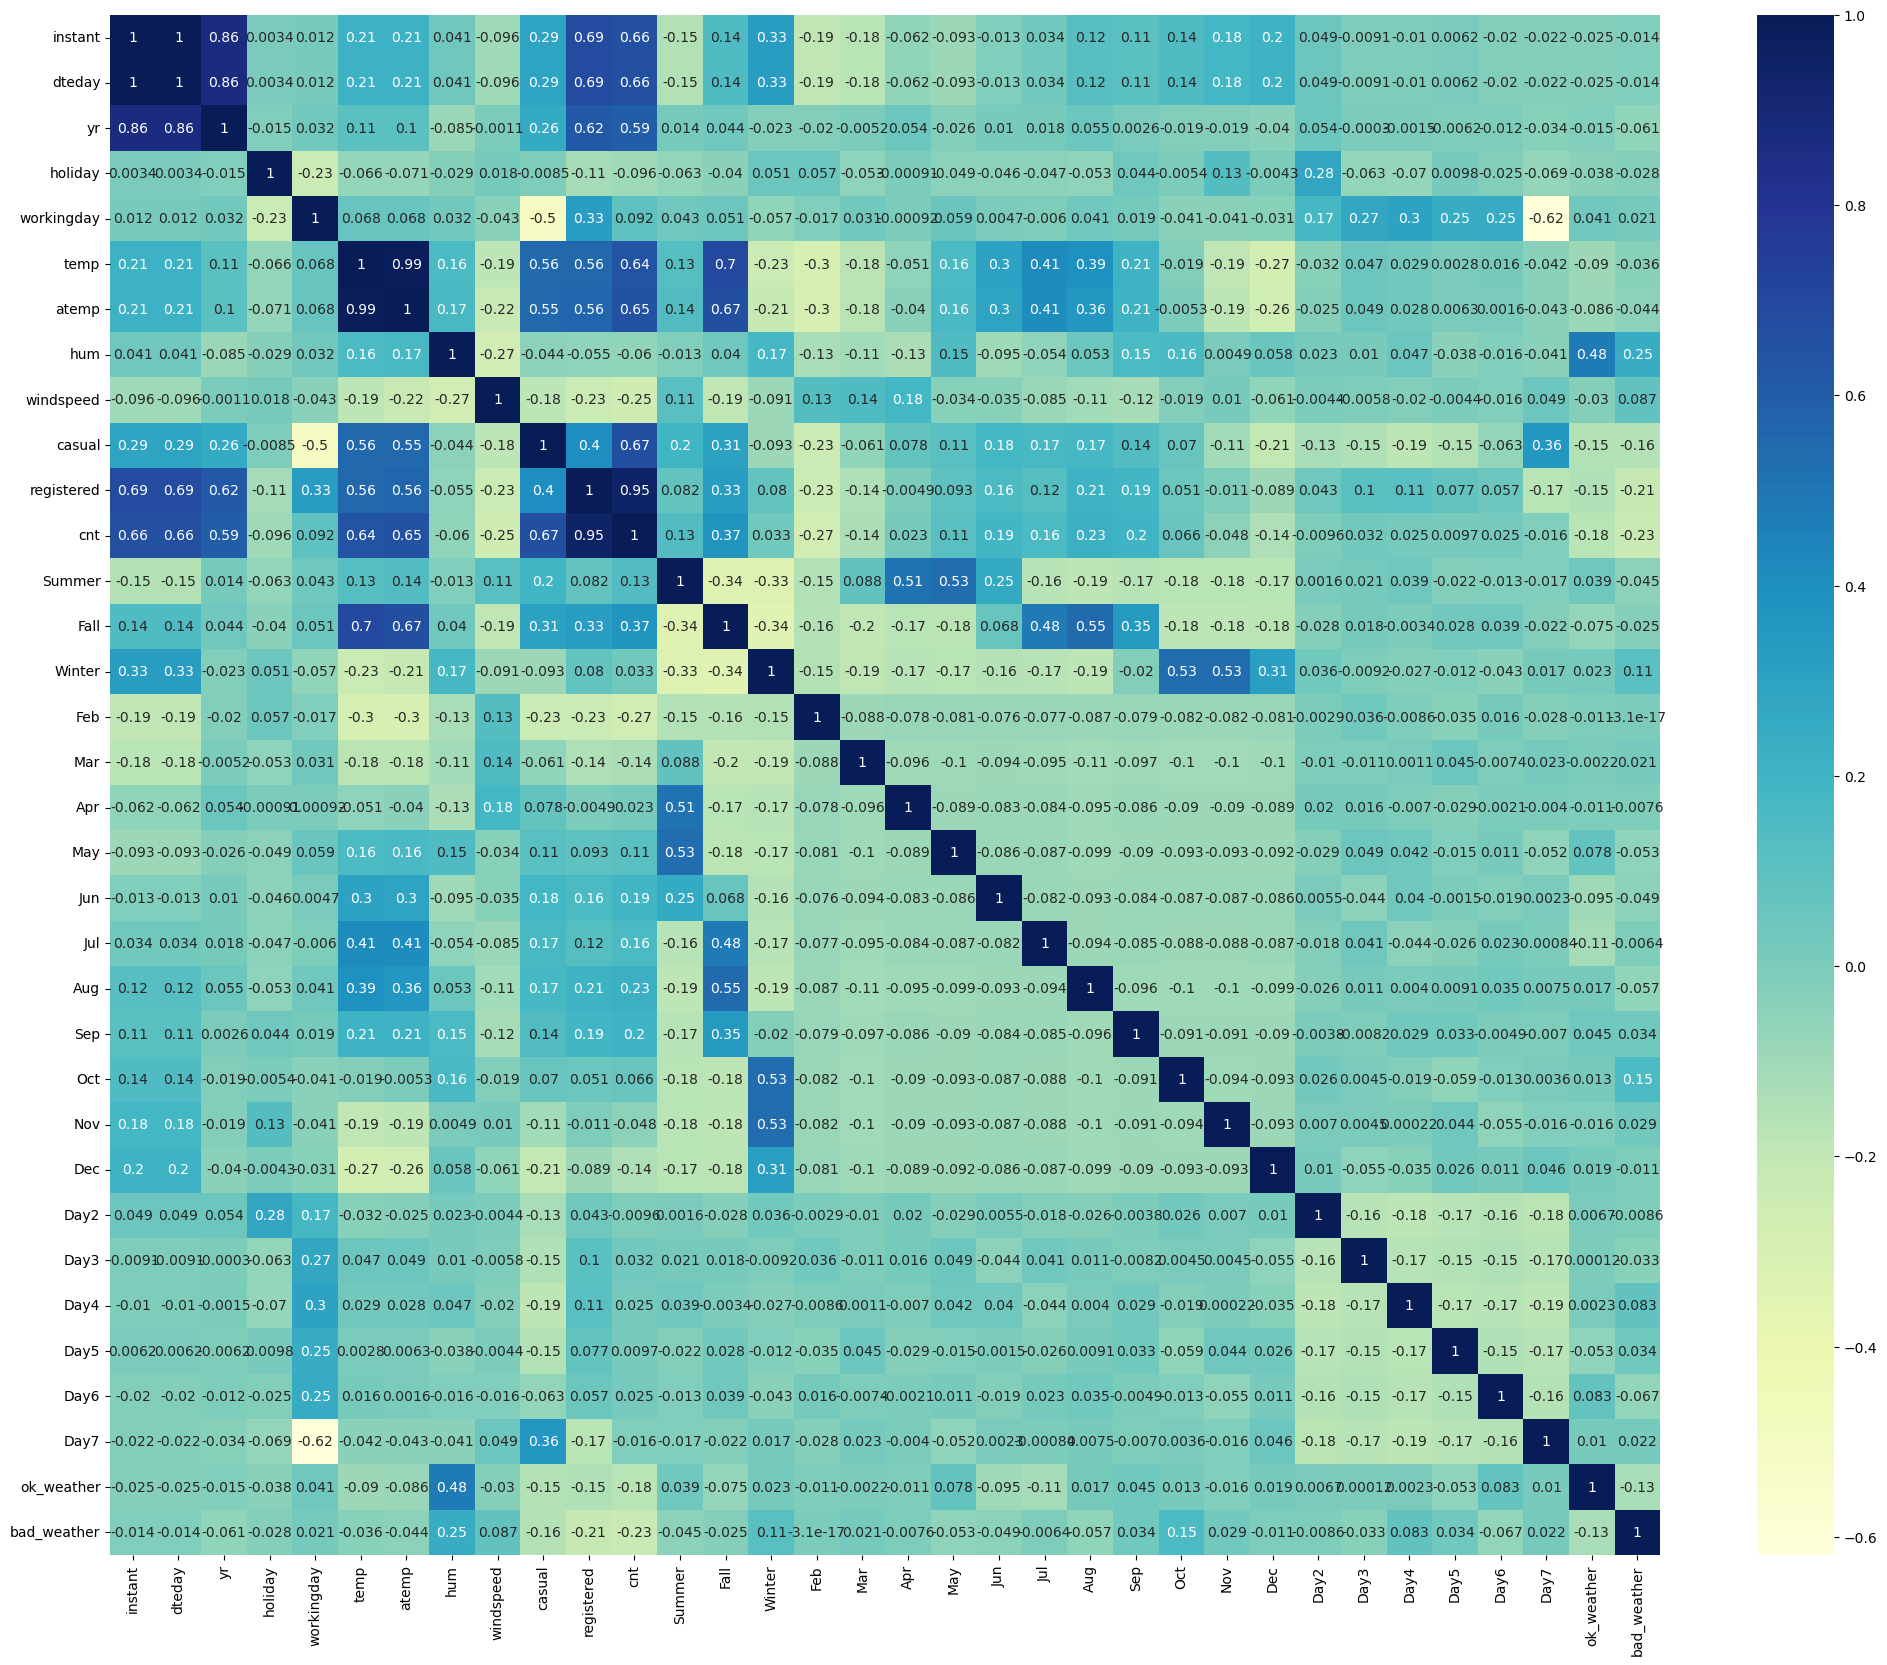

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

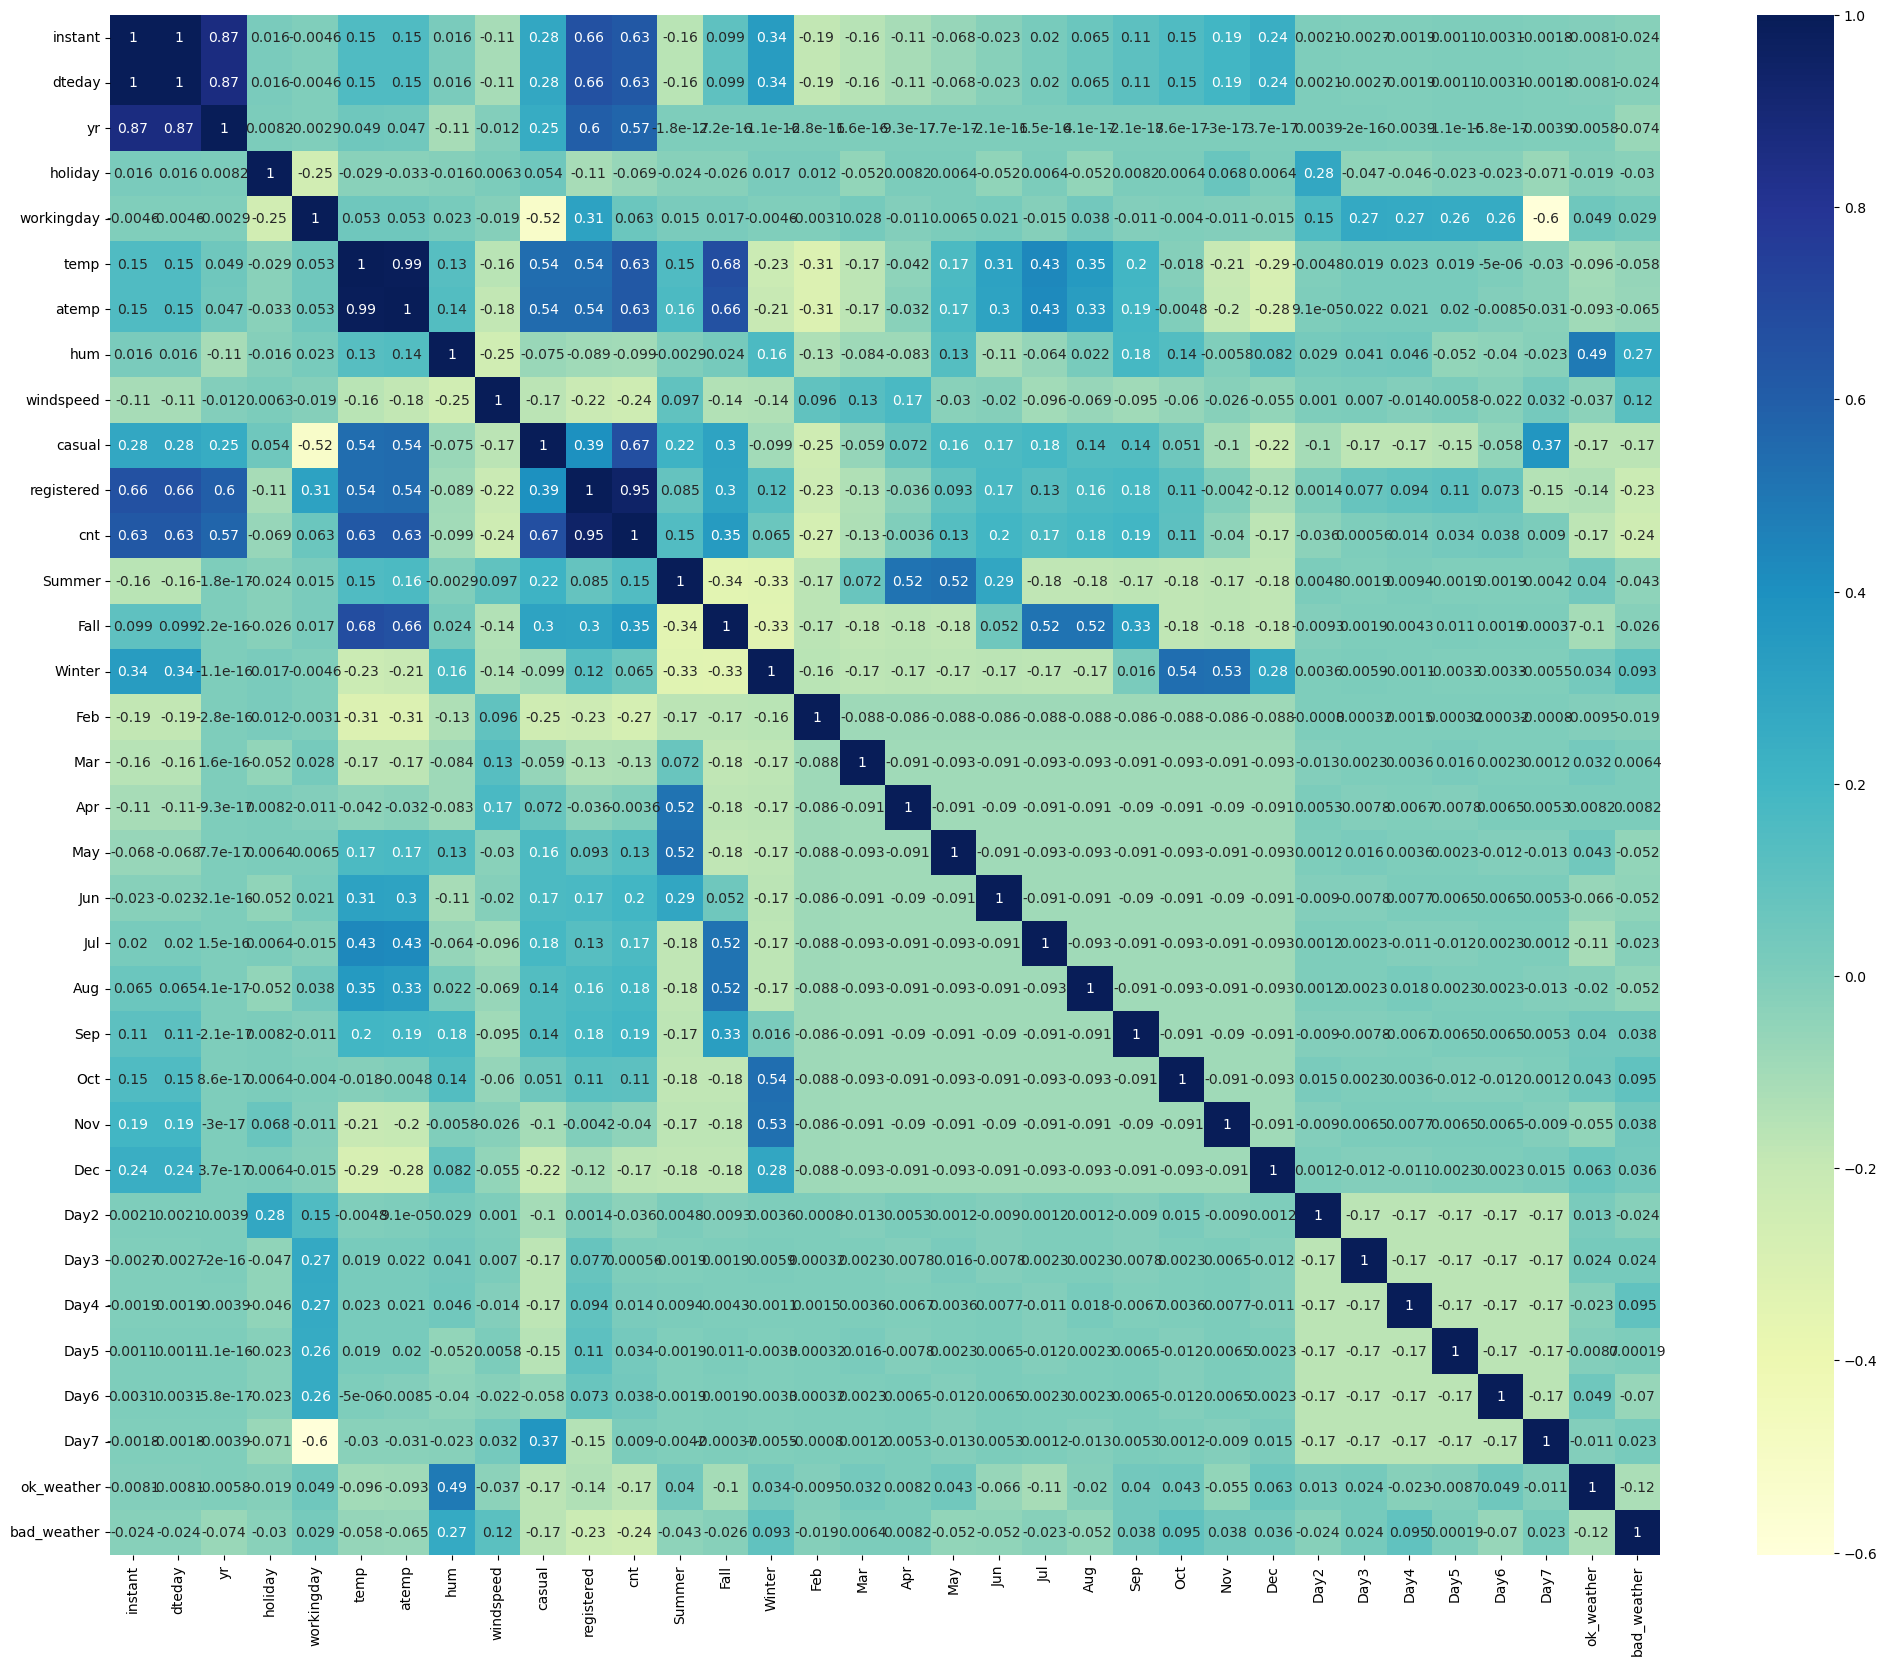

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

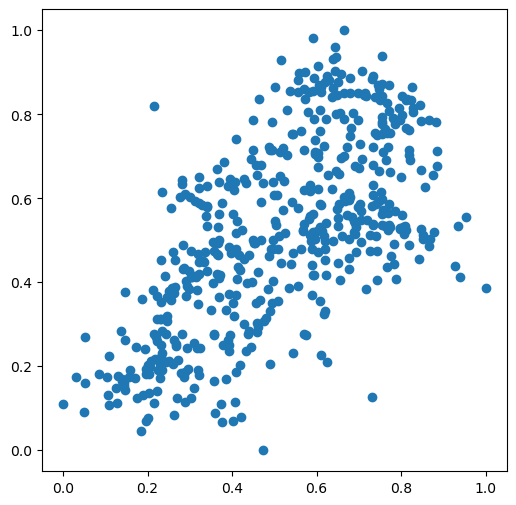

In [35]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

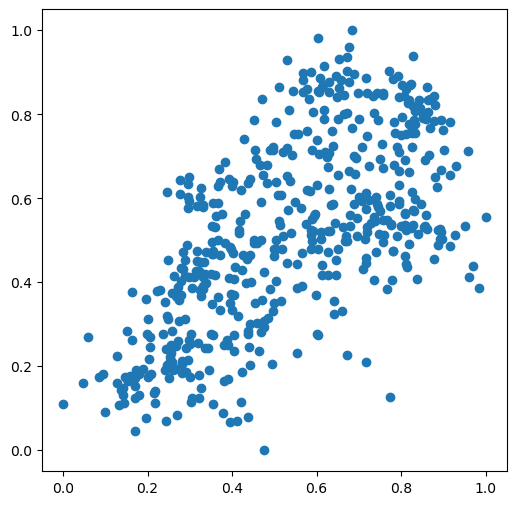

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

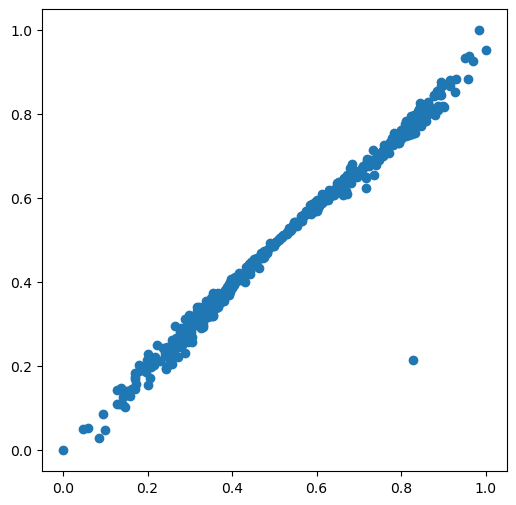

In [37]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.atemp)
plt.show()

- Since Temp and atemp are highly corelated, we will take onlyone variable in our mode. Since "feeling temperature is physically felt by people, we should consider this in our model first
- So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

- We will be using `statsmodels` to fit a regression line through the training data. 
- In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` 

In [39]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Check the parameters obtained

lr.params

const    0.162924
atemp    0.683633
dtype: float64

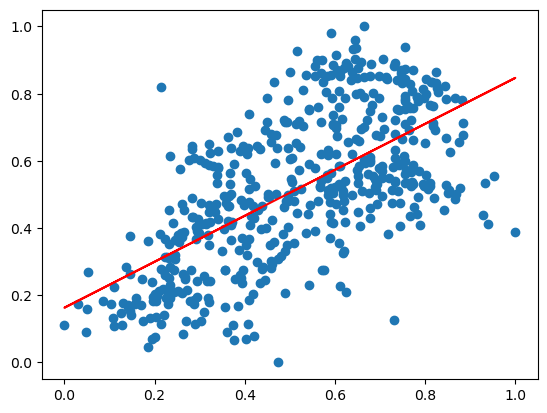

In [41]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [42]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.10e-61
Time:                        15:20:14   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [43]:
# Drop 'instant' as it will not add any value to the model
bike.drop(['instant'], axis = 1, inplace = True)

# Drop 'instant' as it will not add any value to the model
X_train.drop(['instant'], axis = 1, inplace = True)

### Model 2: Adding another variable - 'atemp' and 'yr'

The R-squared value obtained in `model 1` is `0.418`. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [44]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr']]

In [45]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [46]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.07e-131
Time:                        15:20:43   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

### Model 3: Adding another variable - 'atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather'

The adjusted R-squared value obtained with `model 2` is `0.694`. So let's go ahead and add all weather related variables and check the impact of weather on bike riding

In [47]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'Summer', 'Fall', 'Winter', 'Feb',
       'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'ok_weather',
       'bad_weather'],
      dtype='object')

In [48]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather']]

In [49]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params

const          0.227512
atemp          0.585536
yr             0.232402
hum           -0.074406
windspeed     -0.180556
ok_weather    -0.057263
bad_weather   -0.215348
dtype: float64

In [50]:
# Check the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     265.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.98e-152
Time:                        15:21:58   Log-Likelihood:                 402.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     503   BIC:                            -760.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2275      0.033      6.943      

### Model 4: Adding season specific variables to the model - 'atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Summer', 'Fall', 'Winter'

The adjusted R-squared value obtained with `model 3` is `0.76`. So let's go ahead and add all weather related variables and check the impact of weather on bike riding

In [51]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather','Summer', 'Fall', 'Winter']]

In [52]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params

const          0.213013
atemp          0.496172
yr             0.232357
hum           -0.139774
windspeed     -0.165726
ok_weather    -0.052861
bad_weather   -0.233365
Summer         0.125692
Fall           0.097499
Winter         0.163510
dtype: float64

In [53]:
# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          7.26e-180
Time:                        15:22:30   Log-Likelihood:                 475.78
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     500   BIC:                            -889.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2130      0.029      7.463      

### Model 5: 
The adjusted R-squared value obtained with `model 4` is `0.82`. So let's go ahead and add all month related variables and check the impact of weather on bike riding. 

In [54]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather','Summer', 'Fall', 'Winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [55]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.params

const          0.221180
atemp          0.419339
yr             0.233390
hum           -0.162406
windspeed     -0.170808
ok_weather    -0.056251
bad_weather   -0.240719
Summer         0.086739
Fall           0.055570
Winter         0.159820
Feb            0.028942
Mar            0.077672
Apr            0.072668
May            0.112801
Jun            0.094467
Jul            0.055460
Aug            0.116804
Sep            0.165838
Oct            0.074517
Nov            0.015307
Dec            0.018928
dtype: float64

In [56]:
# Check the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          9.52e-181
Time:                        15:25:17   Log-Likelihood:                 507.67
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     489   BIC:                            -884.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2212      0.029      7.575      

## model 5 Inference:
The adjusted R-squared value obtained with `model 5` has gone up to `0.83`. At the same time the p-value of multiple month variables is high. 
Before droping the variables, lets analyze the VIF to understand the collinearity impact

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  52.13
8          Fall  11.25
16          Aug   9.19
15          Jul   8.31
9        Winter   8.13
7        Summer   6.70
17          Sep   6.48
14          Jun   6.29
13          May   6.23
18          Oct   5.98
1         atemp   5.90
19          Nov   5.46
12          Apr   5.21
20          Dec   3.51
11          Mar   2.81
3           hum   2.02
10          Feb   1.71
5    ok_weather   1.57
6   bad_weather   1.28
4     windspeed   1.24
2            yr   1.05

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, the season specific variables are insignificant when we added months in the model. Let's go ahead and drop these variables

### Model 6: 
Lets rebuild the model with month variables instead of season 

In [59]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [60]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.params

const          0.219678
atemp          0.413692
yr             0.235744
hum           -0.151502
windspeed     -0.189203
ok_weather    -0.054552
bad_weather   -0.238548
Feb            0.031410
Mar            0.111496
Apr            0.163119
May            0.200389
Jun            0.172772
Jul            0.113719
Aug            0.173564
Sep            0.244214
Oct            0.234506
Nov            0.175924
Dec            0.129952
dtype: float64

In [61]:
# Check the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.51e-174
Time:                        15:27:08   Log-Likelihood:                 484.07
No. Observations:                 510   AIC:                            -932.1
Df Residuals:                     492   BIC:                            -855.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2197      0.030      7.213      

## model 6 Inference:
The adjusted R-squared value obtained with `model 5` is at `0.82`. At the same time the p-value of one month is higher. 
Before droping any variable, lets analyze the VIF to understand the collinearity impact

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  52.02
1         atemp   5.80
13          Aug   4.97
12          Jul   4.96
11          Jun   4.12
14          Sep   3.60
10          May   3.43
15          Oct   2.73
9           Apr   2.52
8           Mar   2.37
16          Nov   2.12
3           hum   2.01
17          Dec   1.94
7           Feb   1.71
5    ok_weather   1.57
6   bad_weather   1.27
4     windspeed   1.22
2            yr   1.04

## Inference
- The adjusted R-squared value `model 6` (model built with months as features is `0.82`). The adjusted R-squared value `model 4` (model built with season as features is `0.817`)
- However there was no insignificant variables in `model 4` compared to `model 6`. 
- Since there is no significant improvement in adjusted R-squared value, it is better to go ahead with `model 4` and add additional variables related to days to check for further improvment in the model accuracy

### Model 7: 
Lets rebuild the model 4 with days variables instead of months

In [63]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Summer', 'Fall', 'Winter', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'holiday', 'workingday']]

In [64]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.params

const          0.165876
atemp          0.491886
yr             0.233191
hum           -0.122975
windspeed     -0.161554
ok_weather    -0.059669
bad_weather   -0.247503
Summer         0.123871
Fall           0.095736
Winter         0.165610
Day2          -0.011883
Day3          -0.006897
Day4           0.010170
Day5           0.002786
Day6           0.016060
Day7           0.056829
holiday       -0.034912
workingday     0.045147
dtype: float64

In [65]:
# Check the summary
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.16e-178
Time:                        15:28:08   Log-Likelihood:                 491.55
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     493   BIC:                            -877.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1659      0.030      5.491      

## model 7 Inference:
The adjusted R-squared value obtained with `model 7` is at `0.825`. At the same time the p-value of many days is higher. 
Before droping any variable, lets analyze the VIF to understand the collinearity impact

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
17   workingday    inf
10         Day2    inf
16      holiday    inf
14         Day6    inf
13         Day5    inf
12         Day4    inf
11         Day3    inf
0         const  52.81
8          Fall   4.39
1         atemp   3.24
7        Summer   2.49
3           hum   1.89
9        Winter   1.88
15         Day7   1.78
5    ok_weather   1.58
6   bad_weather   1.26
4     windspeed   1.20
2            yr   1.04

## Inference
p-value of the features along with VIF clearly suggests that adding days to the model is not a good idea. So lets go ahead addd drop them. 
However let's keep information related to working days and holidays to see if there is any impact of these variables on the bike renting.

### Model 8: 
Lets remove days variables and keep only working and holiday information

In [67]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Summer', 'Fall', 'Winter', 'holiday', 'workingday']]

In [68]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.params

const          0.203963
atemp          0.492270
yr             0.231672
hum           -0.137172
windspeed     -0.162266
ok_weather    -0.055260
bad_weather   -0.238998
Summer         0.123311
Fall           0.096368
Winter         0.164623
holiday       -0.071526
workingday     0.017757
dtype: float64

In [69]:
# Check the summary
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.71e-180
Time:                        15:29:07   Log-Likelihood:                 482.48
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2040      0.029      7.040      

## model 8 Inference:
The adjusted R-squared value obtained with `model 8` is at `0.821`. However the p-value of the features has reduced drastically. Lets analyze the VIF to understand the collinearity impact

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  47.36
8          Fall   4.38
1         atemp   3.24
7        Summer   2.49
3           hum   1.87
9        Winter   1.87
5    ok_weather   1.56
6   bad_weather   1.25
4     windspeed   1.20
10      holiday   1.07
11   workingday   1.07
2            yr   1.03

## Inference
p-value of the working day seems to be a bit on the higher side. Since working day and holiday are complimentary information. Let's drop working day and check the model again. 

### Model 9: 
Lets remove working day variable

In [71]:
# Assign all the feature variables realted to weather to X
X_train_lm = X_train[['atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Summer', 'Fall', 'Winter', 'holiday']]

In [72]:
# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.params

const          0.216290
atemp          0.493310
yr             0.232096
hum           -0.137920
windspeed     -0.164272
ok_weather    -0.054466
bad_weather   -0.237263
Summer         0.123783
Fall           0.096690
Winter         0.164001
holiday       -0.083368
dtype: float64

In [73]:
# Check the summary
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.06e-180
Time:                        15:30:05   Log-Likelihood:                 480.62
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     499   BIC:                            -892.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2163      0.028      7.637      

The equation of our best fitted line is:

$ Rented_Bikes = 0.493  \times  atemp + 0.232  \times  yr - 0.138 \times hum - 0.164 \times windspeed - 0.055 \times ok_weather - 0.237 \times bad_weather + 0.124 \times Summer + 0.0967 \times Fall + 0.164 \times Winter - 0.0834 \times holiday $


## model 9 Inference:
The adjusted R-squared value obtained with `model 8` is at `0.82`. However the p-value of the features of none of the features is above the significance level. Lets analyze the VIF to understand the collinearity impact

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0         const  45.01
8          Fall   4.38
1         atemp   3.23
7        Summer   2.49
3           hum   1.87
9        Winter   1.87
5    ok_weather   1.56
6   bad_weather   1.25
4     windspeed   1.19
2            yr   1.03
10      holiday   1.01

### Model Inference:
Since the p-values as well as VIF are well within limit and adjusted R-squared value obtained with `model 9` is at `0.82`, let's go ahead with this model

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [76]:
y_train_cnt = lr_9.predict(X_train_lm)

Text(0.5, 0, 'Errors')

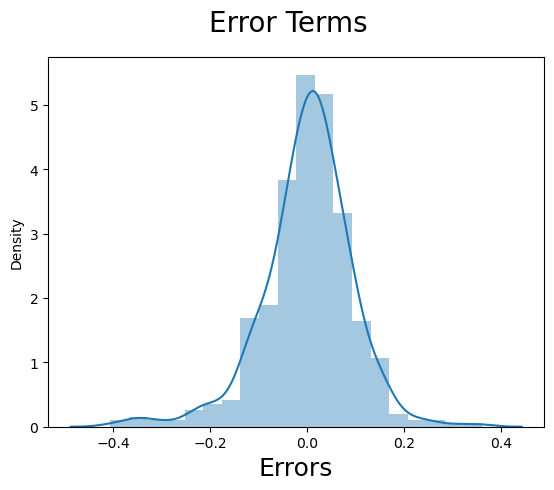

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [78]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_test.describe()

instant                         dteday          yr     holiday  \
count  219.000000                            219  219.000000  219.000000   
mean   356.776256  2018-12-22 18:37:48.493150720    0.479452    0.036530   
min      4.000000            2018-01-04 00:00:00    0.000000    0.000000   
25%    171.000000            2018-06-20 00:00:00    0.000000    0.000000   
50%    349.000000            2018-12-15 00:00:00    0.000000    0.000000   
75%    537.500000            2019-06-21 12:00:00    1.000000    0.000000   
max    730.000000            2019-12-31 00:00:00    1.000000    1.000000   
std    213.665198                            NaN    0.500722    0.188034   

       workingday        temp       atemp         hum   windspeed      casual  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.698630    0.558941    0.532991    0.638508    0.313350    0.266372   
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.002133   
25%      0.000000    0.354650    0.344751    0.527265    0.198517    0.101951   
50%      1.000000    0.558691    0.549198    0.627737    0.299459    0.223712   
75%      1.000000    0.759096    0.714132    0.743928    0.403048    0.362085   
max      1.000000    0.984424    0.980934    1.002146    0.807474    1.038708   
std      0.459904    0.233698    0.217888    0.148974    0.159947    0.217246   

       ...         Nov         Dec        Day2        Day3        Day4  \
count  ...  219.000000  219.000000  219.000000  219.000000  219.000000   
mean   ...    0.073059    0.086758    0.127854    0.164384    0.100457   
min    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000    0.000000   
max    ...    1.000000    1.000000    1.000000    1.000000    1.000000   
std    ...    0.260830    0.282125    0.334692    0.371472    0.301297   

             Day5        Day6        Day7  ok_weather  bad_weather  
count  219.000000  219.000000  219.000000  219.000000   219.000000  
mean     0.164384    0.178082    0.118721    0.319635     0.027397  
min      0.000000    0.000000    0.000000    0.000000     0.000000  
25%      0.000000    0.000000    0.000000    0.000000     0.000000  
50%      0.000000    0.000000    0.000000    0.000000     0.000000  
75%      0.000000    0.000000    0.000000    1.000000     0.000000  
max      1.000000    1.000000    1.000000    1.000000     1.000000  
std      0.371472    0.383458    0.324202    0.467403     0.163612  

[8 rows x 34 columns]

#### Dividing into X_test and y_test

In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
# Adding constant variable to test dataframe
X_test_m9 = sm.add_constant(X_test)

In [91]:
X_train_lm.columns

Index(['const', 'atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather',
       'Summer', 'Fall', 'Winter', 'holiday'],
      dtype='object')

In [92]:
X_test_m9.columns
# 'instant', 

Index(['const', 'instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'Summer', 'Fall',
       'Winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7',
       'ok_weather', 'bad_weather'],
      dtype='object')

In [93]:
# Creating X_test_m9 dataframe by dropping variables from X_test_m9
X_test_m9 = X_test_m9.drop(['instant', 'dteday','workingday', 'temp', 'casual', 'registered', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7'], axis = 1)

In [98]:
X_test_m9.columns

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'Summer', 'Fall',
       'Winter', 'ok_weather', 'bad_weather'],
      dtype='object')

In [99]:
# Define the desired column order
desired_columns = ['const', 'atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather', 'Summer', 'Fall', 'Winter', 'holiday']

# Reorder the columns in the DataFrame
X_test_m9 = X_test_m9[desired_columns]


In [100]:
X_test_m9.columns

Index(['const', 'atemp', 'yr', 'hum', 'windspeed', 'ok_weather', 'bad_weather',
       'Summer', 'Fall', 'Winter', 'holiday'],
      dtype='object')

In [101]:
# Making predictions using the fourth model

y_pred_m9 = lr_9.predict(X_test_m9)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

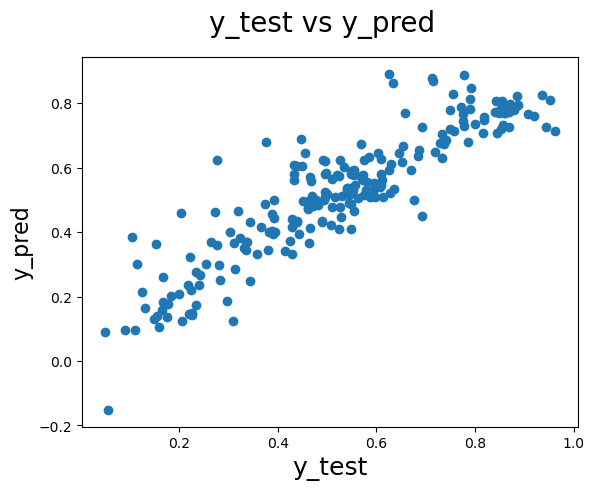

In [102]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m9)

0.8085323560692144